In [1]:
import math
from collections import Counter

def entropy(class_propability):
    return sum(-p * math.log2(p)
             for p in class_propability
             if p) 


def class_propability(labels):
    total_count = len(labels)
    return [count / total_count for count in Counter(labels).values()]

def data_entropy(labeled_data):
    labels = [label for _, label in labeled_data]
    probabilities = class_propability(labels)

    return entropy(probabilities)

def partition_entropy(subsets):
    total_count = sum(len(subsets) for subset in subsets)
    return sum(data_entropy(subset)*len(subset) / total_count for subset in subsets)

from collections import defaultdict

def partittion_by(inputs, attribute):
     #inputの中身は(属性、ラベル)
    groups = defaultdict(list)
    for input in inputs:
        key = input[0][attribute]
        groups[key].append(input)
    return(groups)

def partition_entropy_by(inputs, attribute):
        #分割されたエントロピーを計算する
    partitions = partittion_by(inputs, attribute)
    return partition_entropy(partitions.values())

inputs = [
({'天気':'晴れ','気温':'高い','湿度':'高い'},      False),
({'天気':'曇り','気温':'低い','湿度':'高い'},      True),
({'天気':'曇り','気温':'高い','湿度':'低い'},      False),
({'天気':'晴れ','気温':'低い','湿度':'高い'},      True),
({'天気':'雨','気温':'低い','湿度':'高い'},     False),
]



for key in ['天気','気温','湿度']:
    print(key, partition_entropy_by(inputs, key))



天気 0.4444444444444444
気温 0.6887218755408672
湿度 1.0


In [2]:
senior_inputs = [(input, label) for input, label in inputs if input['天気'] == '晴れ']
for key in ['気温', '湿度']:
    print(key, partition_entropy_by(senior_inputs, key))



気温 0.0
湿度 2.0


In [3]:
senior_inputs = [(input, label) for input, label in inputs if input['天気'] == '曇り']
for key in ['気温', '湿度']:
    print(key, partition_entropy_by(senior_inputs, key))

気温 0.0
湿度 0.0


In [4]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]

x = X['LSTAT'].values

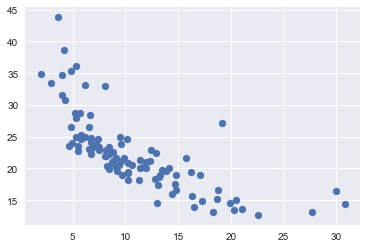

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(x,y)

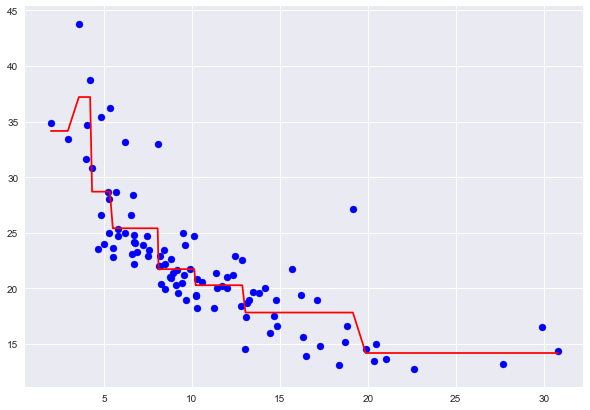

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(x[:,None],y)

sort_idx = x[:,None].flatten().argsort()

plt.figure(figsize=(10,7))
plt.scatter(x[sort_idx],y[sort_idx], c="blue", label="Training Points")
plt.plot(x[sort_idx],tree.predict(x[sort_idx].reshape(-1,1)),color="red",label="depth=3")

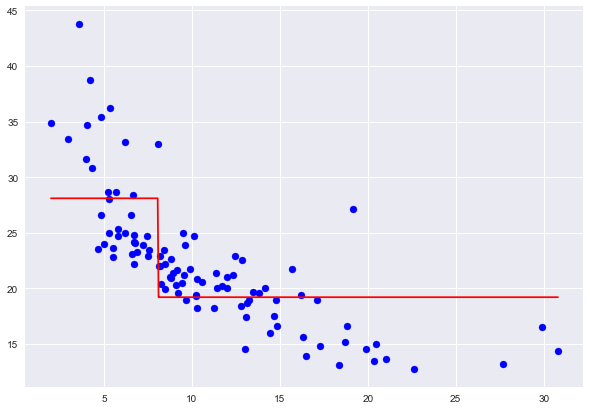

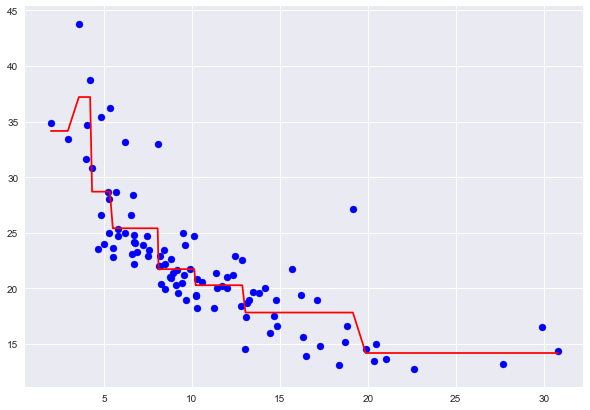

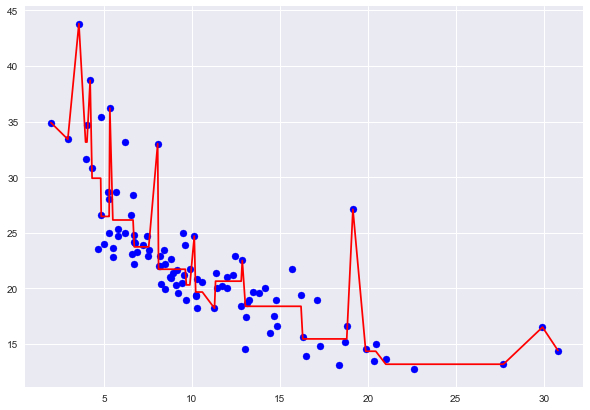

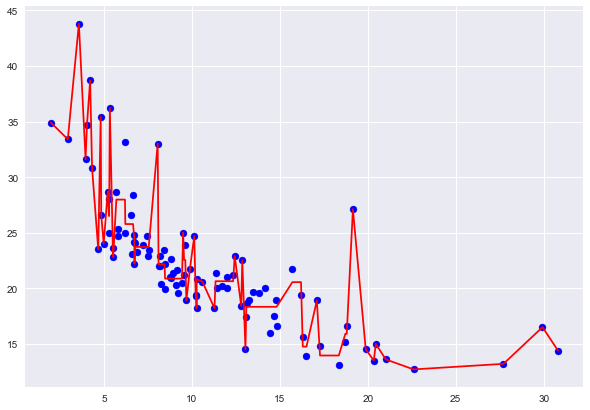

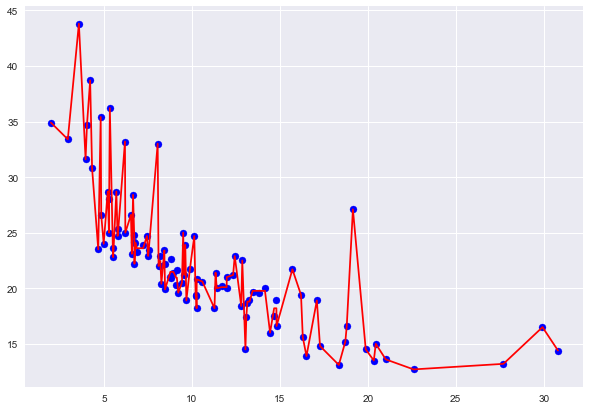

In [14]:
depth_list=[1,3,5,7,10]

for depth in depth_list:
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(x[:,None],y)

    sort_idx = x[:,None].flatten().argsort()

    plt.figure(figsize=(10,7))
    plt.scatter(x[sort_idx],y[sort_idx], c="blue", label="Training Points")
    plt.plot(x[sort_idx],tree.predict(x[sort_idx].reshape(-1,1)),color="red",label="depth={}".format(depth))
    plt.show()